In [5]:
'''
Date: 2022.08.27
Title: 
By: Kang Jin Seong
'''
''' # k-최근접 이웃의 한계'''

'''## 데이터 준비 '''

import pandas as pd # pd는 관례적으로 사용하는 판다스의 별칭입니다.
df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)
print(perch_full.shape)


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [6]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

print(train_input.shape)

(42, 3)


In [7]:

''' ## 사이킷런의 변환기'''

from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures() # 선형방정식의 특성을 추가하는 형변환기
poly = PolynomialFeatures(include_bias = False) # 절편 추가

# poly.fit([[2,3]])
# print(poly.transform([[2,3]]))

poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [8]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
'''
Date: 2022.08.29
Title: 
By: Kang Jin Seong
'''

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [18]:
poly = PolynomialFeatures(degree = 5, include_bias = False) # 절편 추가
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [19]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 샘플 갯수보다 특성이 많다면
#훈련세트에 대해 거의 거의 완벽하게 학습할수 있다.
# 하지만 이런 모델은 훈련세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 만든다.

0.9999999999991097
-144.40579242684848


In [20]:
# 샘플 값 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 다항 회귀에서 훈련모델에 과대적합되는 것을 막기 위해 규제를 건다.
# 규제는 릿지(ridge)와 라쏘(lasso)가 있다.
# 릿지는 계수를 제곱한 값을 기준으로 적용
# 라쏘는 계수의 절대값을 기준으로 규제를 적용

In [22]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


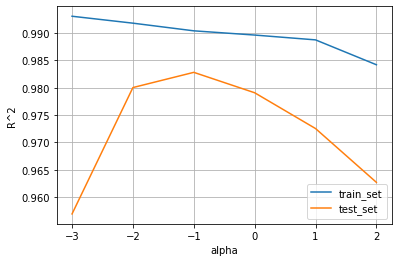

In [26]:
'''
사람이 지정해야하는 매개 변수
- 머신러닝 모델이 학습할 수 없고 사람이 알려줘야하는 파라미터를 하이퍼파라미터(hyperparameter)
1) 함수와 클래스의 파라미터는 매개변수
2) 모델과 관련된 파리미터(모델 파라미터, 하이퍼파라미터)는 파라미터라고 표현
'''

import matplotlib.pyplot as plt
import numpy as np
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, label = 'train_set')
plt.plot(np.log10(alpha_list), test_score, label = 'test_set')
plt.xlabel('alpha'); plt.ylabel('R^2')
plt.legend(); plt.grid()
plt.show()

In [27]:
# 가장 높은 alpha 값으로 모델 훈련
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570365
0.9827976465386884


In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


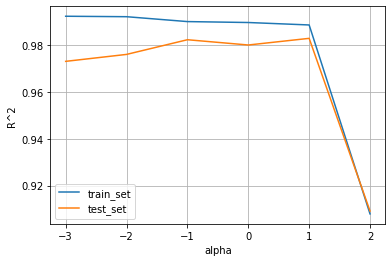

In [30]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, label = 'train_set')
plt.plot(np.log10(alpha_list), test_score, label = 'test_set')
plt.xlabel('alpha'); plt.ylabel('R^2')
plt.legend(); plt.grid()
plt.show()

In [31]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [33]:
# 라쏘 모델의 계수는 coef_ 속성에 저장됨
print(np.sum(lasso.coef_ == 0))
'''55개의 특성중 40개의 특성은 사용하지 않음.'''

40


'55개의 특성중 40개의 특성은 사용하지 않음.'